# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [21]:
#1
df1 = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')
print(pd.crosstab(df1['treatment'], df1['breast_cancer_death']), '\n')
print('Mammogram Survival (%): ', 100*(44425/(44425+500)))
print('Control Survival (%): ', 100*(44405/(44405+505)))
print('Difference in Survival Rates: ', 100*(44425/(44425+500))-100*(44405/(44405+505)))

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

Mammogram Survival (%):  98.88703394546467
Control Survival (%):  98.87552883544868
Difference in Survival Rates:  0.011505110015988862


In [23]:
#2
df1['survive'] = 0
df1.loc[ df1['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df1.loc[ df1['treatment'] == 'mammogram', :]
df_control = df1.loc[ df1['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

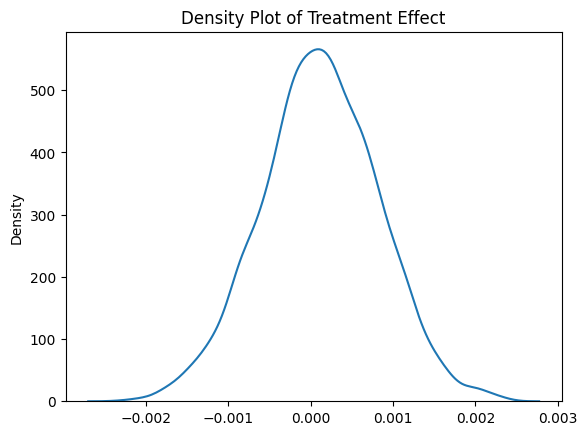

In [24]:
#2
sns.kdeplot(fx)
plt.title('Density Plot of Treatment Effect')
plt.show()

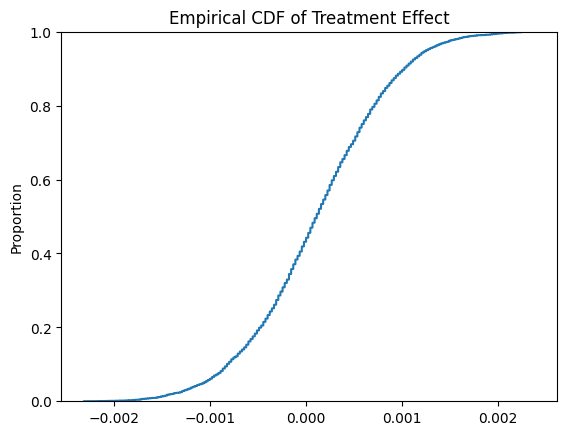

In [25]:
#2
sns.ecdfplot(fx)
plt.title('Empirical CDF of Treatment Effect')
plt.show()

In [27]:
#3
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )
print('The confidence interval does include 0.')

99% confidence interval: ( -0.0017105999422328444 ,  0.0020073759836497624 )
The confidence interval does include 0.


\#4.

This data definitely undermines the importance for people to get regular mammograms. Because the 99% confidence interval includes 0, it implies that there is no certain difference between the effect of getting mammograms vs doing nothing. There are previous studies that have indicated that gettign regular mammograms allows breast cancer to be caught in earlier stages, causing a lower death rate/higher survival. I would like to see mammograms compared to other treatment options rather than just the "control" variable.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [5]:
df = pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1
df.head()

,Unnamed: 0,treatment,outcome,success
0,1,met,success,1
1,2,rosi,failure,0
2,3,rosi,success,1
3,4,lifestyle,success,1
4,5,met,success,1


In [7]:
#1
print(pd.crosstab(df['treatment'], df['outcome']), '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 



In [11]:
#2
print('lifestyle success: ',100*(125/(125+109)),'%\n')
print('metformin success: ', 100*(112/(112+120)),'%\n')
print('rosiglitazone success: ', 100*(143/(143+90)),'%\n')

lifestyle success:  53.41880341880342 %

metformin success:  48.275862068965516 %

rosiglitazone success:  61.37339055793991 %



Rosiglitazone seems to be the most successful as it has the highest success percentage.

In [14]:
#3
df_life = df.loc[ df['treatment'] == 'lifestyle', :]
df_rosi = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_life = []
fx_rosi = []
fx_met = []
for t in range(S):
    df_life_t = df_life.sample( df_life.shape[0], axis=0, replace=True)
    df_rosi_t = df_rosi.sample( df_rosi.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_life_t = np.mean(df_life_t['success'])
    fx_rosi_t = np.mean(df_rosi_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_life.append(fx_life_t)
    fx_rosi.append(fx_rosi_t)
    fx_met.append(fx_met_t)

gdf_life = pd.DataFrame({'value':fx_life, 'intervention':'lifestyle'})
gdf_rosi = pd.DataFrame({'value':fx_rosi, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_life, gdf_rosi, gdf_met], axis=0)

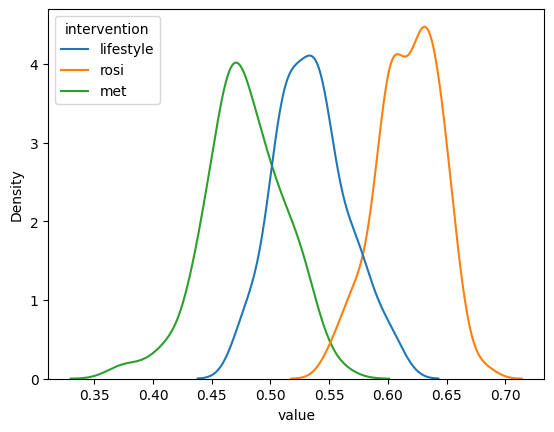

In [13]:
#3
sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

Rosiglitazone still seems to be the best intervention, followed by lifestyle, then metformin.

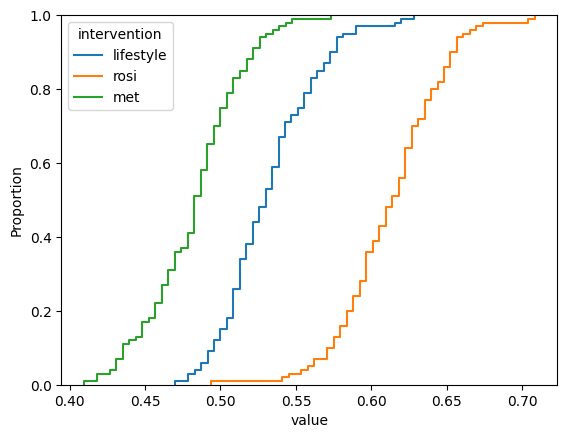

In [15]:
#3
sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

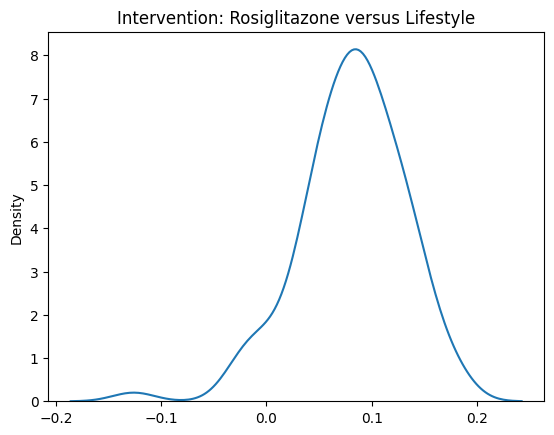


90% Confidence, rosi minus lifestyle:  -0.01062048347456066 ,  0.15236143208246208


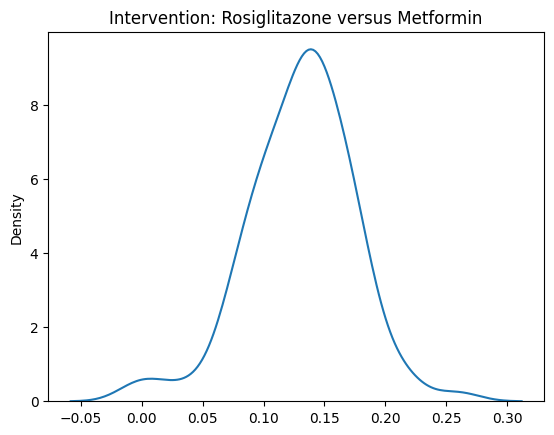


90% Confidence interval, rosi minus metformin:  0.07008287701642738 ,  0.19119431700458786


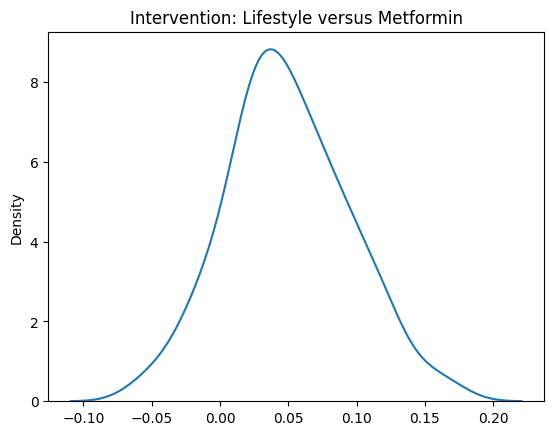


90% Confidence interval, lifestyle minus metformin:  -0.017631889183613334 ,  0.1240292513999411


In [17]:
#4
rosi_versus_lifestyle = np.array(fx_rosi)-np.array(fx_life)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.title('Intervention: Rosiglitazone versus Lifestyle')
plt.show()
print('\n90% Confidence, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_rosi)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.title('Intervention: Rosiglitazone versus Metformin')
plt.show()
print('\n90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_life)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.title('Intervention: Lifestyle versus Metformin')
plt.show()
print('\n90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

It is clear from the second plot that Rosiglitazone is better than metformin, as 0 is not included in the 90% confidence interval. The comparison of rosi to lifestyle and lifestyle to metformin both included 0 in the confidence interval, showing discrepancy for which is superior.